## Loaded Dataset
Loaded the Amazon product reviews dataset from the `/content/amazon_product_reviews.csv` file into a pandas DataFrame for EDA(Exploratory Data Analysis).


In [ ]:
#imported libraries as per the need of the code blocks throughout the whole process
import pandas as pd
path= '/content/amazon_product_reviews.csv'
print("Loading dataset from colab...")

df=pd.read_csv(path)
print("First 5 rows of the DataFrame:")
df.head()

Loading dataset from colab...
First 5 rows of the DataFrame:


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


### For sentiment analysis, only the Text and Score column is needed, rest of the other columns can also be used which will be discussed later on in this study.

In [ ]:
#Made a new df using the deep copy of the imported dataframe to obtain the originality of the actual dataset.
new_df=df.copy(deep=True)
new_df=new_df[['Text','Score']]
new_df.head()

,Text,Score
0,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,4
3,If you are looking for the secret ingredient i...,2
4,Great taffy at a great price. There was a wid...,5


In [ ]:
new_df.tail()

,Text,Score
568449,Great for sesame chicken..this is a good if no...,5
568450,I'm disappointed with the flavor. The chocolat...,2
568451,"These stars are small, so you can give 10-15 o...",5
568452,These are the BEST treats for training and rew...,5
568453,"I am very satisfied ,product is as advertised,...",5


### Let's see the details overview of the dataset.

In [ ]:
print("\nSummary of the DataFrame:")
new_df.info()


Summary of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Text    568454 non-null  object
 1   Score   568454 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 8.7+ MB


In [ ]:
print("\nDescriptive statistics of the DataFrame:")
new_df.describe()


Descriptive statistics of the DataFrame:


,Score
count,568454.000000
mean,4.183199
std,1.310436
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


### describe() tells that the Score column has min=1 and max=5, so we can distribute the positive(4-5), negative(1-2), neutral=3 for the sentiment expression.

## Text Normalization
Applied text normalization to the review text by converting all text to lowercase, removing HTML tags, numerical values, punctuation, special characters, and extra whitespace. Empty text fields will also be handled.


To perform text normalization, I defined a function called normalized_text that handled all specified cleaning steps and then applied it to the 'Text' column then stored the results in 'cleaned_text' column.



In [ ]:
import re

def normalize_text(text):
    if not isinstance(text, str): #this handles non-string inputs (like NaN)
        return ""
    text =text.lower()
    text =re.sub(r'<.*?>', '', text) #HTML tags removal
    text =re.sub(r'\d+', '', text) #numerical values reomoval
    text =re.sub(r'[^a-z\s]', '', text) #punctuation and special characters, keep only letters and spaces
    text =re.sub(r'\s+', ' ', text).strip() #Replaced multiple spaces with a single space and whitespace striped
    return text

In [ ]:
new_df['cleaned_text']= new_df['Text'].apply(normalize_text)#applied the function

print("Original and Cleaned Text for the first 5 rows:")
new_df[['Text', 'cleaned_text']].head()

Original and Cleaned Text for the first 5 rows:


,Text,cleaned_text
0,I have bought several of the Vitality canned d...,i have bought several of the vitality canned d...
1,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled as jumbo salted peanut...
2,This is a confection that has been around a fe...,this is a confection that has been around a fe...
3,If you are looking for the secret ingredient i...,if you are looking for the secret ingredient i...
4,Great taffy at a great price. There was a wid...,great taffy at a great price there was a wide ...


## Tokenization
This will split the normalized clean review text into individual words or tokens using NLTK's word tokenizer.


To perform tokenization, imported NLTK, ensured the 'punkt' and 'punkt_tab' tokenizer data is downloaded and cretaed a function to tokenize text using `nltk.word_tokenize`, applied this function to the 'cleaned_text' column.Displayed the results for verification of the process.



In [ ]:
import nltk
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)

#Function to tokenize texts using NLTK
def tokenize_text(text):
    if not isinstance(text, str) or not text.strip():#fallback for Null data
        return []
    Tokenizer=nltk.word_tokenize(text)
    return Tokenizer

In [ ]:
#Applied the tokenized_text Function to generate new column named tokenized_text
new_df['tokenized_text'] = new_df['cleaned_text'].apply(tokenize_text)

print("Cleaned Text and Tokenized Text")
new_df.head()

Cleaned Text and Tokenized Text


,Text,Score,cleaned_text,tokenized_text
0,I have bought several of the Vitality canned d...,5,i have bought several of the vitality canned d...,"[i, have, bought, several, of, the, vitality, ..."
1,Product arrived labeled as Jumbo Salted Peanut...,1,product arrived labeled as jumbo salted peanut...,"[product, arrived, labeled, as, jumbo, salted,..."
2,This is a confection that has been around a fe...,4,this is a confection that has been around a fe...,"[this, is, a, confection, that, has, been, aro..."
3,If you are looking for the secret ingredient i...,2,if you are looking for the secret ingredient i...,"[if, you, are, looking, for, the, secret, ingr..."
4,Great taffy at a great price. There was a wid...,5,great taffy at a great price there was a wide ...,"[great, taffy, at, a, great, price, there, was..."


## Stopword Removal

This process requires to remove common English stopwords from the tokenized_text, preserving negation words. <br/> <br/>
To preserve negation words, modified the standard NLTK stopword list by removing common negation terms from it. Applied this modified list to get the text_without_stopwords column, and displayed the original and processed text.<br/>


In [ ]:
import nltk
nltk.download('stopwords', quiet=True)
from nltk.corpus import stopwords

stop_words=set(stopwords.words('english'))
negation_words = {
    'not', 'no', 'don', "don't", 'aren', "aren't", 'couldn', "couldn't",
    'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't",
    'haven', "haven't", 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't",
    'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't",
    'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"
}

#removed negation words from the stop_words set to preserve the negation
#that holds sentiments/expression
stop_words_with_negation = stop_words - negation_words

def remove_stopwords(tokens):
  txt_without_stopwords=[]
  if not isinstance(tokens, list):
      return []
  for word in tokens:
    if word not in stop_words_with_negation:
      txt_without_stopwords.append(word)
  return txt_without_stopwords

In [ ]:
new_df['text_without_stopwords'] =new_df['tokenized_text'].apply(remove_stopwords)

print("Tokenized Text and Text without Stopwords")
new_df[['tokenized_text', 'text_without_stopwords']].head()

Tokenized Text and Text without Stopwords


,tokenized_text,text_without_stopwords
0,"[i, have, bought, several, of, the, vitality, ...","[bought, several, vitality, canned, dog, food,..."
1,"[product, arrived, labeled, as, jumbo, salted,...","[product, arrived, labeled, jumbo, salted, pea..."
2,"[this, is, a, confection, that, has, been, aro...","[confection, around, centuries, light, pillowy..."
3,"[if, you, are, looking, for, the, secret, ingr...","[looking, secret, ingredient, robitussin, beli..."
4,"[great, taffy, at, a, great, price, there, was...","[great, taffy, great, price, wide, assortment,..."


## Lemmatization

Apply lemmatization to the text after stopword removal to reduce words to their base or root form.

Imported NLTK's WordNetLemmatizer, ensure the 'wordnet' and 'omw-1.4' data are downloaded, defined a function nammed lemmatize_tokens to apply this function to the 'text_without_stopwords' column, and displayed the results after the process.

In [ ]:
import nltk
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_text(tokens):
  lemma_texts=[]
  if not isinstance(tokens, list):
      return []
  for word in tokens:
    lemma_texts.append(lemmatizer.lemmatize(word))
  return lemma_texts

In [ ]:
new_df['lemmatized_text']= new_df['text_without_stopwords'].apply(lemmatize_text)

print("Text without Stopwords and Lemmatized Text")
new_df[['text_without_stopwords', 'lemmatized_text']].head()

Text without Stopwords and Lemmatized Text


,text_without_stopwords,lemmatized_text
0,"[bought, several, vitality, canned, dog, food,...","[bought, several, vitality, canned, dog, food,..."
1,"[product, arrived, labeled, jumbo, salted, pea...","[product, arrived, labeled, jumbo, salted, pea..."
2,"[confection, around, centuries, light, pillowy...","[confection, around, century, light, pillowy, ..."
3,"[looking, secret, ingredient, robitussin, beli...","[looking, secret, ingredient, robitussin, beli..."
4,"[great, taffy, great, price, wide, assortment,...","[great, taffy, great, price, wide, assortment,..."


## Final Cleaned Text
Joined the lemmatized text to construct the final cleaned text and displayed actual text review and final_cleaned_text review.


In [ ]:
new_df['final_cleaned_text']= new_df['lemmatized_text'].apply(lambda x: ' '.join(x))

print("Lemmatized Text and Final Cleaned Text")
new_df[['Text', 'final_cleaned_text']].head()

Lemmatized Text and Final Cleaned Text


,Text,final_cleaned_text
0,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...
1,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanutsth...
2,This is a confection that has been around a fe...,confection around century light pillowy citrus...
3,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...
4,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...


In [ ]:
new_df.head()

,Text,Score,cleaned_text,tokenized_text,text_without_stopwords,lemmatized_text,final_cleaned_text
0,I have bought several of the Vitality canned d...,5,i have bought several of the vitality canned d...,"[i, have, bought, several, of, the, vitality, ...","[bought, several, vitality, canned, dog, food,...","[bought, several, vitality, canned, dog, food,...",bought several vitality canned dog food produc...
1,Product arrived labeled as Jumbo Salted Peanut...,1,product arrived labeled as jumbo salted peanut...,"[product, arrived, labeled, as, jumbo, salted,...","[product, arrived, labeled, jumbo, salted, pea...","[product, arrived, labeled, jumbo, salted, pea...",product arrived labeled jumbo salted peanutsth...
2,This is a confection that has been around a fe...,4,this is a confection that has been around a fe...,"[this, is, a, confection, that, has, been, aro...","[confection, around, centuries, light, pillowy...","[confection, around, century, light, pillowy, ...",confection around century light pillowy citrus...
3,If you are looking for the secret ingredient i...,2,if you are looking for the secret ingredient i...,"[if, you, are, looking, for, the, secret, ingr...","[looking, secret, ingredient, robitussin, beli...","[looking, secret, ingredient, robitussin, beli...",looking secret ingredient robitussin believe f...
4,Great taffy at a great price. There was a wid...,5,great taffy at a great price there was a wide ...,"[great, taffy, at, a, great, price, there, was...","[great, taffy, great, price, wide, assortment,...","[great, taffy, great, price, wide, assortment,...",great taffy great price wide assortment yummy ...


## Created One-Hot Encoded Sentiment category Columns
Three new binary (0/1) columns: 'is_negative', 'is_neutral', and 'is_positive' in the `new_df` DataFrame. they are generated based on the 'Score' column, where 1-2 is 'is_negative'=1, 3 is 'is_neutral'=1, and 4-5 is 'is_positive'=1. This conversion provides a one-hot encoded representation of the score-based sentiment.


In [ ]:
new_df['is_negative'] = new_df['Score'].apply(lambda x: 1 if x <= 2 else 0)
new_df['is_neutral'] = new_df['Score'].apply(lambda x: 1 if x == 3 else 0)
new_df['is_positive'] = new_df['Score'].apply(lambda x: 1 if x >= 4 else 0)

print("DataFrame with new one-hot encoded sentiment columns:")
new_df.head()

DataFrame with new one-hot encoded sentiment columns:


,Text,Score,cleaned_text,tokenized_text,text_without_stopwords,lemmatized_text,final_cleaned_text,is_negative,is_neutral,is_positive
0,I have bought several of the Vitality canned d...,5,i have bought several of the vitality canned d...,"[i, have, bought, several, of, the, vitality, ...","[bought, several, vitality, canned, dog, food,...","[bought, several, vitality, canned, dog, food,...",bought several vitality canned dog food produc...,0,0,1
1,Product arrived labeled as Jumbo Salted Peanut...,1,product arrived labeled as jumbo salted peanut...,"[product, arrived, labeled, as, jumbo, salted,...","[product, arrived, labeled, jumbo, salted, pea...","[product, arrived, labeled, jumbo, salted, pea...",product arrived labeled jumbo salted peanutsth...,1,0,0
2,This is a confection that has been around a fe...,4,this is a confection that has been around a fe...,"[this, is, a, confection, that, has, been, aro...","[confection, around, centuries, light, pillowy...","[confection, around, century, light, pillowy, ...",confection around century light pillowy citrus...,0,0,1
3,If you are looking for the secret ingredient i...,2,if you are looking for the secret ingredient i...,"[if, you, are, looking, for, the, secret, ingr...","[looking, secret, ingredient, robitussin, beli...","[looking, secret, ingredient, robitussin, beli...",looking secret ingredient robitussin believe f...,1,0,0
4,Great taffy at a great price. There was a wid...,5,great taffy at a great price there was a wide ...,"[great, taffy, at, a, great, price, there, was...","[great, taffy, great, price, wide, assortment,...","[great, taffy, great, price, wide, assortment,...",great taffy great price wide assortment yummy ...,0,0,1


##Descriptive Statistics and Analysis with data preparation
created a `text_length` column by calculating the word count of `final_cleaned_text`.


In [ ]:
new_df['text_length'] = new_df['final_cleaned_text'].apply(lambda x: len(x.split()))

print("Lemmatized Text and Final Cleaned Text with Text Length:")
new_df[['final_cleaned_text', 'text_length']].head()

Lemmatized Text and Final Cleaned Text with Text Length:


,final_cleaned_text,text_length
0,bought several vitality canned dog food produc...,23
1,product arrived labeled jumbo salted peanutsth...,19
2,confection around century light pillowy citrus...,41
3,looking secret ingredient robitussin believe f...,18
4,great taffy great price wide assortment yummy ...,13


Added New column named Sentiment to hold the Labels of sentiment and it will later help to conduct text length vs sentiment class plot.

In [ ]:
import numpy as np
#assigned sentiment labels to each row and got all the True data of encoded columns
sentiment_categs=['Negative', 'Neutral', 'Positive']
new_df['sentiment'] = np.select(
    [new_df['is_negative']==1, new_df['is_neutral']==1, new_df['is_positive']==1],
    sentiment_categs,
    default="Unknown"
)

new_df[['final_cleaned_text','text_length','sentiment']].head()

,final_cleaned_text,text_length,sentiment
0,bought several vitality canned dog food produc...,23,Positive
1,product arrived labeled jumbo salted peanutsth...,19,Negative
2,confection around century light pillowy citrus...,41,Positive
3,looking secret ingredient robitussin believe f...,18,Negative
4,great taffy great price wide assortment yummy ...,13,Positive


Box plot for sentiment class vs text_length plot

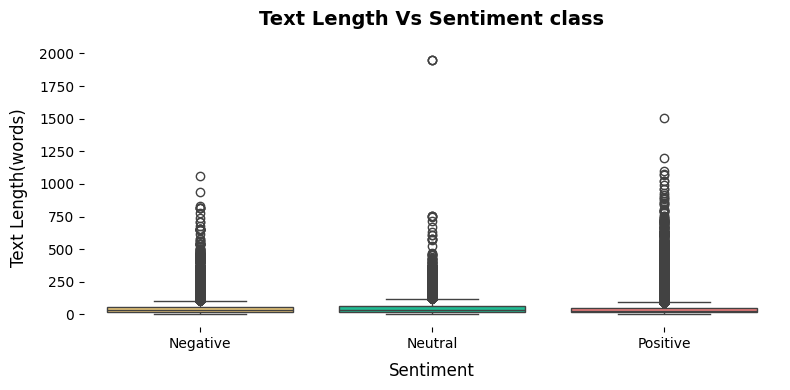

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#sentiment class vs text_length plot
plt.figure(figsize=(8, 4))
sns.boxplot(
    x="sentiment",
    y="text_length",
    data=new_df,
    palette=["#FF6B6B", "#FFD166", "#06D6A0"],
    hue="sentiment",
    order=sentiment_categs,
    legend=False
)

# Customize plot
plt.title(
    "Text Length Vs Sentiment class",
    fontsize=14,
    pad=16,
    fontweight="bold"
)
plt.xlabel("Sentiment", fontsize=12, labelpad=8)
plt.ylabel("Text Length(words)", fontsize=12, labelpad=8)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

Datafram's Overview

In [ ]:
total_reviews = len(new_df)
avg_text_length = new_df['text_length'].mean()

#joined all final cleaned texts into single string then split into words to find unique words
all_words = ' '.join(new_df['final_cleaned_text'].astype(str)).split()
unique_words = len(set(all_words))

print(f"Total No. of Reviews: {total_reviews}")
print(f"Average Text Length: {avg_text_length:.2f} words")
print(f"Total Unique Words: {unique_words}")

Total No. of Reviews: 568454
Average Text Length: 40.81 words
Total Unique Words: 298963


## Word cloud of the review accross the space

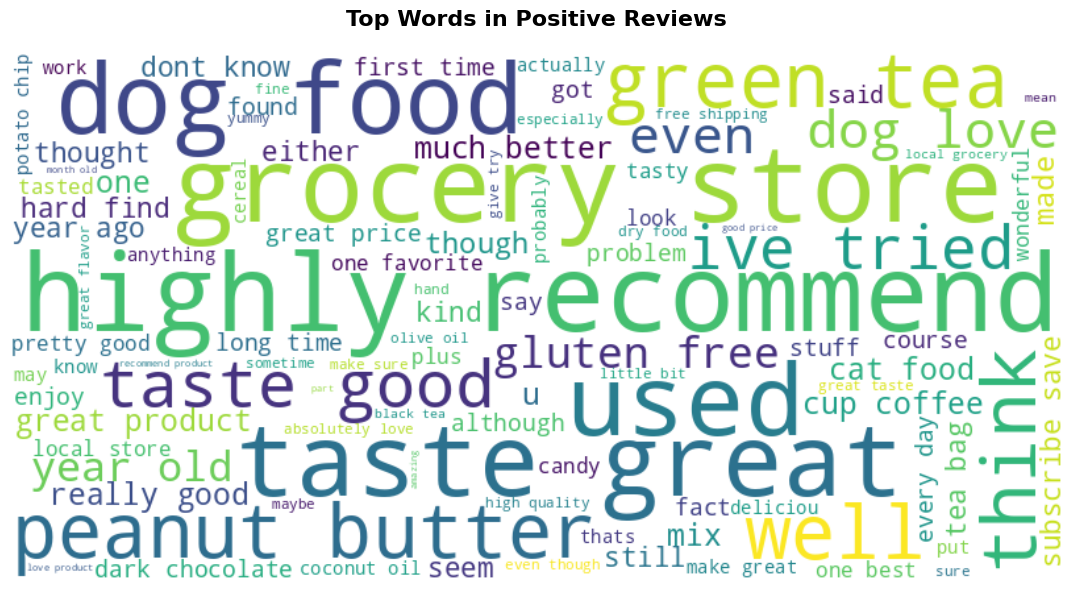

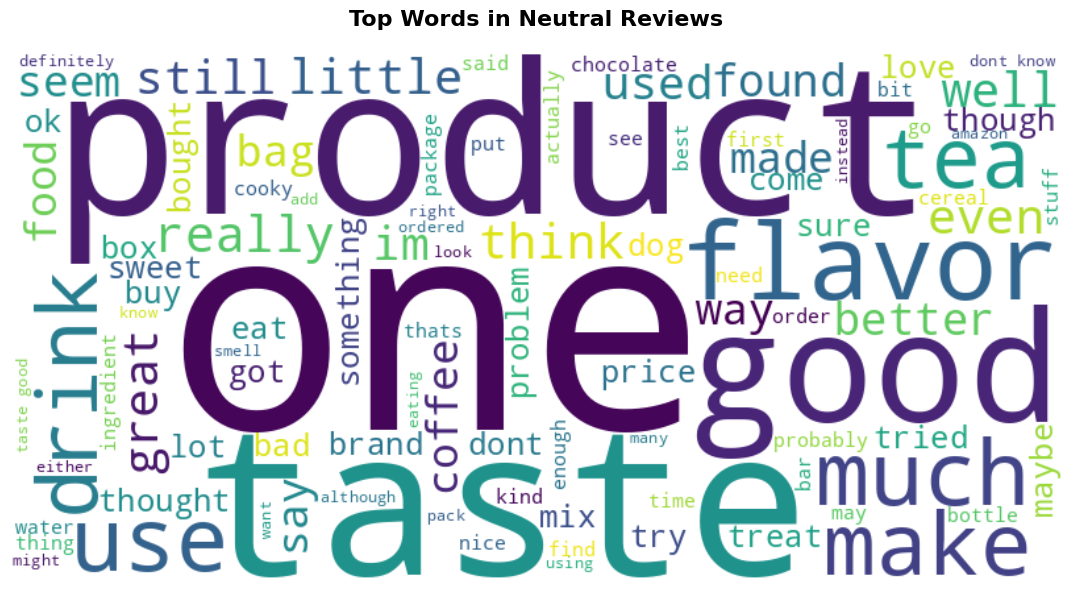

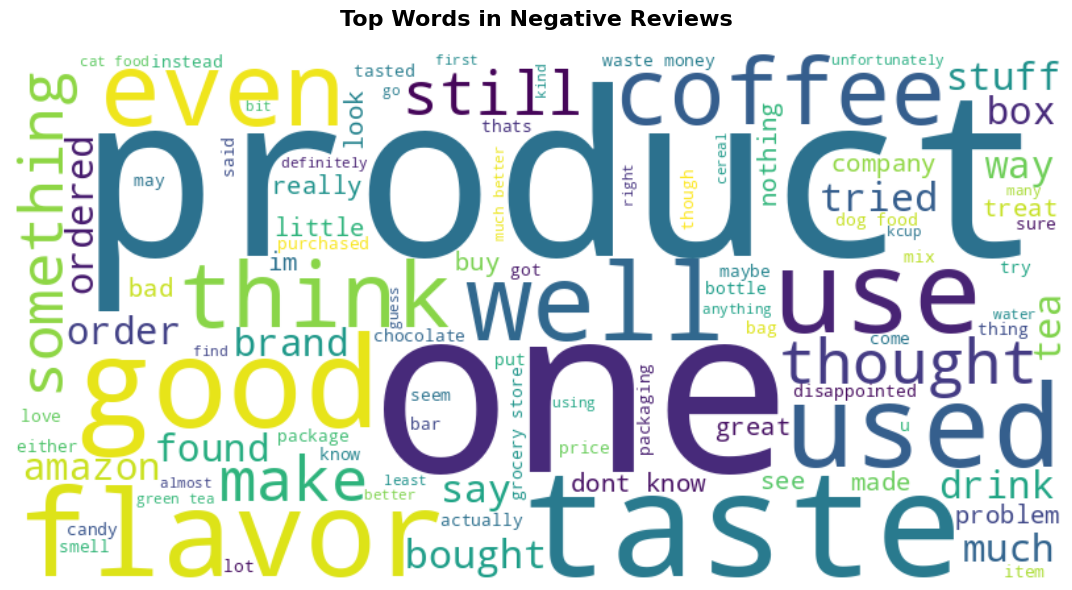

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#word clouds for each sentiment class
for sentiment in ["is_positive", "is_neutral", "is_negative"]:
    #combined all cleaned text for the current sentiment into a single string
    #filtered new_df where the sentiment column is 1, then get 'final_cleaned_text'
    text = " ".join(new_df[new_df[sentiment] == 1]['final_cleaned_text'])

    #generating word cloud
    wordcloud = WordCloud(
        width=800,          # Width of the word cloud image
        height=400,         # Height of the word cloud image
        background_color="white",  # Background color
        colormap="viridis", # Color scheme for words
        max_words=100       # Maximum number of words to display
    ).generate(text)        # Generate the word cloud from the text

    #figure and display of the word cloud
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation="bilinear")  # Display the word cloud
    plt.title(
        f"Top Words in {sentiment.replace('is_', '').title()} Reviews",
        fontsize=16,
        pad=20,
        fontweight="bold"
    )
    plt.axis("off")
    plt.tight_layout() #Adjusted layout to prevent clipping
    plt.show()

## Sentiment Categories Distribution
Visualized the distribution of sentiment categories (negative, neutral, positive) based on the encoded columns. This will help understand the sentiment class/category balance within the dataset, which is crucial for next steps.

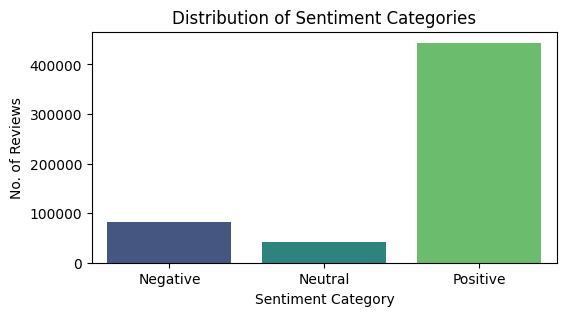

Sentiment Category/Class Distribution:
Negative     82037--(14.43%)
Neutral       42640--(7.50%)
Positive    443777--(78.07%)
dtype: object


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#counted of the sentiment categories
sentiment_counts = new_df[['is_negative', 'is_neutral', 'is_positive']].sum()

#turnned one-hot encoded columns into descriptive labels for plotting
sentiment_labels = {
    'is_negative': 'Negative',
    'is_neutral': 'Neutral',
    'is_positive': 'Positive'
}
plot_data = sentiment_counts.rename(index=sentiment_labels)

#created the bar plot
plt.figure(figsize=(6, 3))
sns.barplot(x=plot_data.index, y=plot_data.values, hue=plot_data.index, palette='viridis', legend=False)
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment Category')
plt.ylabel('No. of Reviews')
plt.show()

print("Sentiment Category/Class Distribution:")
#added percentage for better understanding and concatenating with the plot_data values
custom_plot_data = plot_data.apply(lambda x: f"{x}--({x/total_reviews*100:.2f}%)")
print(custom_plot_data)

## TF-IDF vectorization

In [ ]:
#Now, need to make the TF-IDF and Embedding for the model training preparations later
from sklearn.feature_extraction.text import TfidfVectorizer

#TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000) #limiting features to 5000 to manage memory and complexity

#applied TF-IDF to the 'final_cleaned_text' column
tfidf_matrix = tfidf_vectorizer.fit_transform(new_df['final_cleaned_text'])

print("Shape of the TF-IDF matrix:")
print(tfidf_matrix.shape)


Shape of the TF-IDF matrix:
(568454, 5000)


## Applying VADER Sentiment Analysis

Applied VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analysis to the `final_cleaned_text` column to obtain compound sentiment scores. Convert these scores into categorical sentiment labels (positive, negative, neutral) and store them in a new column.

Defined a function to categorize the `vader_compound_score` into 'positive', 'negative', or 'neutral' sentiments based on common thresholds (e.g., compound score >= 0.05 for positive, <= -0.05 for negative, and between -0.05 and 0.05 for neutral)

In [ ]:
import nltk
nltk.download('vader_lexicon', quiet=True)
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

def get_vader_compound_score(text):
    if not isinstance(text, str) or not text.strip():
        return 0.0 #neutral score for empty or non-string text
    return sia.polarity_scores(text)['compound']

#creating 'vader_compound_score'
new_df['vader_compound_score'] = new_df['final_cleaned_text'].apply(get_vader_compound_score)

#VADER compound score into sentiment labels
def categorize_vader_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

#creating 'vader_sentiment_category'
new_df['vader_sentiment_category'] = new_df['vader_compound_score'].apply(categorize_vader_sentiment)

print("VADER sentiment scores and categories:")
new_df[['final_cleaned_text', 'vader_compound_score', 'vader_sentiment_category']].head()

VADER sentiment scores and categories:


,final_cleaned_text,vader_compound_score,vader_sentiment_category
0,bought several vitality canned dog food produc...,0.9413,Positive
1,product arrived labeled jumbo salted peanutsth...,0.0762,Positive
2,confection around century light pillowy citrus...,0.8624,Positive
3,looking secret ingredient robitussin believe f...,0.4404,Positive
4,great taffy great price wide assortment yummy ...,0.9468,Positive


In [ ]:
new_df.head()

,Text,Score,cleaned_text,tokenized_text,text_without_stopwords,lemmatized_text,final_cleaned_text,is_negative,is_neutral,is_positive,text_length,sentiment,vader_compound_score,vader_sentiment_category
0,I have bought several of the Vitality canned d...,5,i have bought several of the vitality canned d...,"[i, have, bought, several, of, the, vitality, ...","[bought, several, vitality, canned, dog, food,...","[bought, several, vitality, canned, dog, food,...",bought several vitality canned dog food produc...,0,0,1,23,Positive,0.9413,Positive
1,Product arrived labeled as Jumbo Salted Peanut...,1,product arrived labeled as jumbo salted peanut...,"[product, arrived, labeled, as, jumbo, salted,...","[product, arrived, labeled, jumbo, salted, pea...","[product, arrived, labeled, jumbo, salted, pea...",product arrived labeled jumbo salted peanutsth...,1,0,0,19,Negative,0.0762,Positive
2,This is a confection that has been around a fe...,4,this is a confection that has been around a fe...,"[this, is, a, confection, that, has, been, aro...","[confection, around, centuries, light, pillowy...","[confection, around, century, light, pillowy, ...",confection around century light pillowy citrus...,0,0,1,41,Positive,0.8624,Positive
3,If you are looking for the secret ingredient i...,2,if you are looking for the secret ingredient i...,"[if, you, are, looking, for, the, secret, ingr...","[looking, secret, ingredient, robitussin, beli...","[looking, secret, ingredient, robitussin, beli...",looking secret ingredient robitussin believe f...,1,0,0,18,Negative,0.4404,Positive
4,Great taffy at a great price. There was a wid...,5,great taffy at a great price there was a wide ...,"[great, taffy, at, a, great, price, there, was...","[great, taffy, great, price, wide, assortment,...","[great, taffy, great, price, wide, assortment,...",great taffy great price wide assortment yummy ...,0,0,1,13,Positive,0.9468,Positive


## Model Based Approach
Splited the dataset into test(20%) and train(80%).<br/>
Initiated model pipeline for Naive Bayes, Logistic Regression, Linear SVM based on the generated `tfidf_vectorizer` object.

In [ ]:
from sklearn.model_selection import train_test_split

#feature and target selection
X = new_df["final_cleaned_text"].astype(str)
y = new_df["sentiment"].astype(str)

#20% test and 80% train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Model Pipeline creation

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC


#Naive Bayes pipeline
nb_model = Pipeline([
    ("tfidf", tfidf_vectorizer),#passed the vectorizer object
    ("clf", MultinomialNB())
])
nb_model.fit(X_train, y_train)

#Logistic Regression pipeline
lr_model = Pipeline([
    ("tfidf", tfidf_vectorizer),
    ("clf", LogisticRegression(max_iter=2000, class_weight="balanced"))
])
lr_model.fit(X_train, y_train)

#Linear SVM pipeline
svm_model = Pipeline([
    ("tfidf", tfidf_vectorizer),
    ("clf", LinearSVC(class_weight="balanced"))
])
svm_model.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=5000)),
                ('clf', LinearSVC(class_weight='balanced'))])

## Rule based (VADER) Classification Report

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("VADER Classification Report")
print(classification_report(new_df["sentiment"], new_df["vader_sentiment_category"]))

vader_cm = confusion_matrix(new_df["sentiment"], new_df["vader_sentiment_category"])
vader_cm

VADER Classification Report
              precision    recall  f1-score   support

    Negative       0.51      0.37      0.43     82037
     Neutral       0.13      0.04      0.06     42640
    Positive       0.84      0.94      0.88    443777

    accuracy                           0.79    568454
   macro avg       0.49      0.45      0.46    568454
weighted avg       0.74      0.79      0.76    568454



array([[ 30449,   4466,  47122],
       [  7218,   1684,  33738],
       [ 21746,   7092, 414939]])

## Descriptive Statistics and Distribution of VADER Sentiment Scores
Calculate and display descriptive statistics for the `vader_compound_score` column. Additionally, visualize the distribution of `vader_sentiment_category` using a bar plot to compare VADER's sentiment assignment with the score-based sentiment.

In [ ]:
print("\nDescriptive statistics for VADER compound score:")
print(new_df['vader_compound_score'].describe())

# Count the occurrences of each VADER sentiment category
vader_sentiment_counts = new_df['vader_sentiment_category'].value_counts()
print("\nDistribution of VADER Sentiment Categories:")
print(vader_sentiment_counts)


Descriptive statistics for VADER compound score:
count    568454.000000
mean          0.636853
std           0.454680
min          -0.999500
25%           0.544800
50%           0.839600
75%           0.933700
max           0.999800
Name: vader_compound_score, dtype: float64

Distribution of VADER Sentiment Categories:
vader_sentiment_category
Positive    495799
Negative     59413
Neutral      13242
Name: count, dtype: int64


## Model Based Classification Report for Naive Bayes, Logistic Regression, Linear SVM model

In [ ]:
from sklearn.metrics import classification_report

models = {
    "Naive Bayes": nb_model,
    "Logistic Regression": lr_model,
    "Linear SVM": svm_model
}

for name, model in models.items():
    preds = model.predict(X_test)
    print(f"\n{name} Classification Report")
    print(classification_report(y_test, preds))


Naive Bayes Classification Report
              precision    recall  f1-score   support

    Negative       0.83      0.26      0.40     16407
     Neutral       0.51      0.00      0.00      8528
    Positive       0.81      1.00      0.90     88756

    accuracy                           0.81    113691
   macro avg       0.72      0.42      0.43    113691
weighted avg       0.79      0.81      0.76    113691


Logistic Regression Classification Report
              precision    recall  f1-score   support

    Negative       0.63      0.74      0.68     16407
     Neutral       0.26      0.63      0.37      8528
    Positive       0.97      0.81      0.88     88756

    accuracy                           0.78    113691
   macro avg       0.62      0.72      0.64    113691
weighted avg       0.87      0.78      0.81    113691


Linear SVM Classification Report
              precision    recall  f1-score   support

    Negative       0.68      0.75      0.71     16407
     Neutral     

## Confusion matrix of Model Based Approach

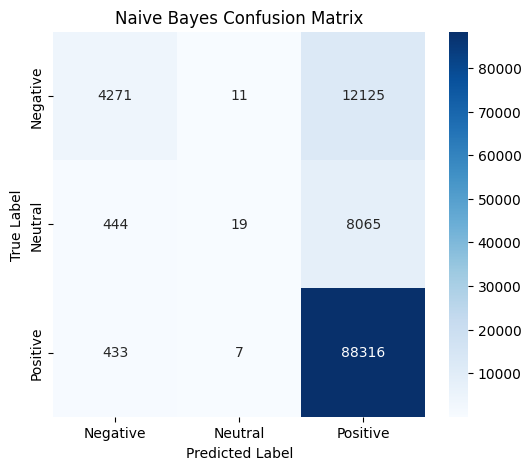

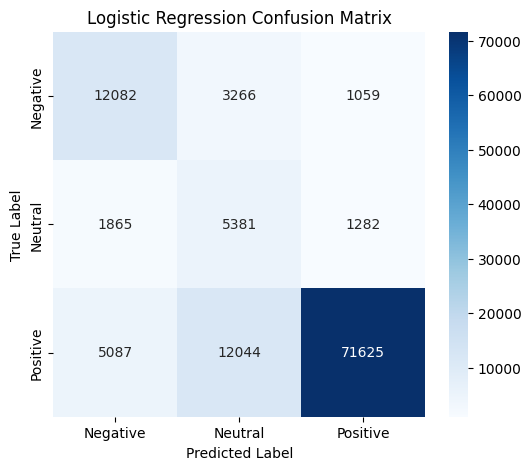

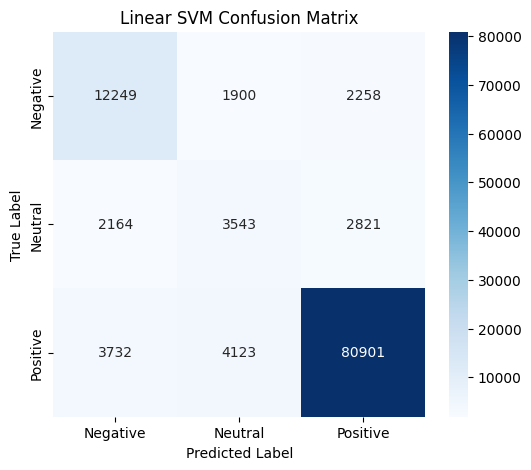

In [ ]:
from sklearn.metrics import confusion_matrix

models = {
    "Naive Bayes": nb_model,
    "Logistic Regression": lr_model,
    "Linear SVM": svm_model
}

labels = ['Negative', 'Neutral', 'Positive'] # Define labels using the sentiment categories

for name, model in models.items():
    preds = model.predict(X_test)
    cm = confusion_matrix(y_test, preds, labels=labels)

    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=labels, yticklabels=labels, cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

## ROC Curve and AUC Analysis

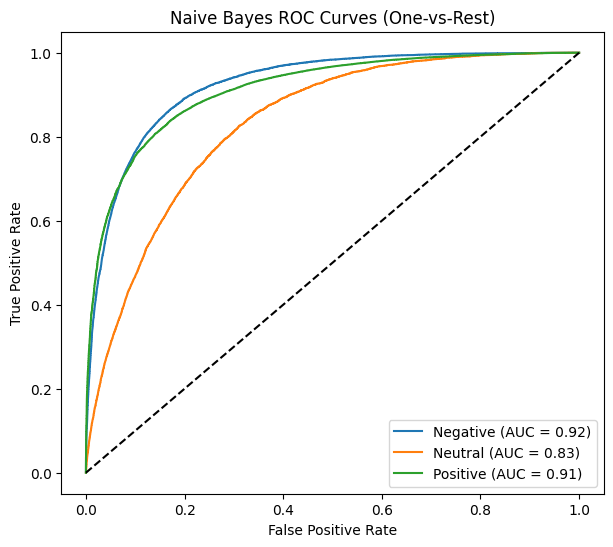

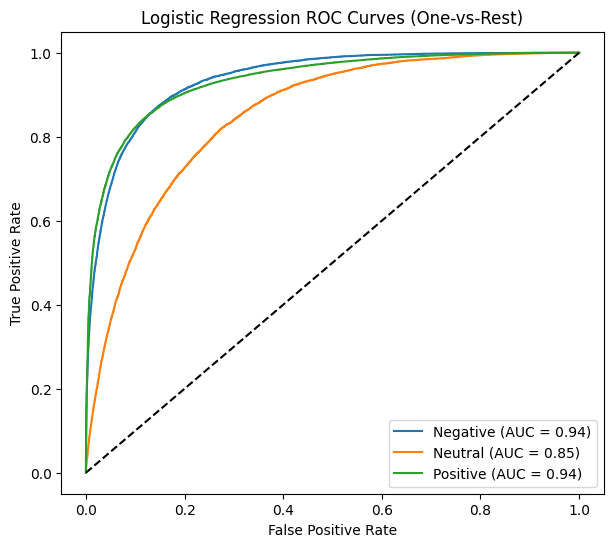

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np

# Binarize labels
y_test_bin = label_binarize(y_test, classes=labels)
n_classes = y_test_bin.shape[1]

models_proba = {
    "Naive Bayes": nb_model,
    "Logistic Regression": lr_model
}

for name, model in models_proba.items():
    y_score = model.predict_proba(X_test)

    plt.figure(figsize=(7,6))
    for i, label in enumerate(labels):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{label} (AUC = {roc_auc:.2f})")

    plt.plot([0,1], [0,1], "k--")
    plt.title(f"{name} ROC Curves (One-vs-Rest)")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()


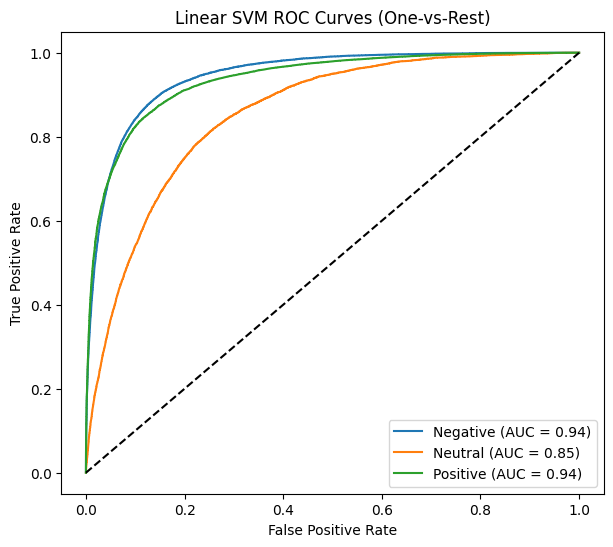

In [ ]:
y_score_svm = svm_model.decision_function(X_test)

plt.figure(figsize=(7,6))
for i, label in enumerate(labels):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_svm[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{label} (AUC = {roc_auc:.2f})")

plt.plot([0,1], [0,1], "k--")
plt.title("Linear SVM ROC Curves (One-vs-Rest)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()
